# Introducción a Análisis Exploratorio de Datos

In [1]:
library(datasets)
library(tidyverse, quietly = TRUE, verbose = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Variación

## Distribuciones

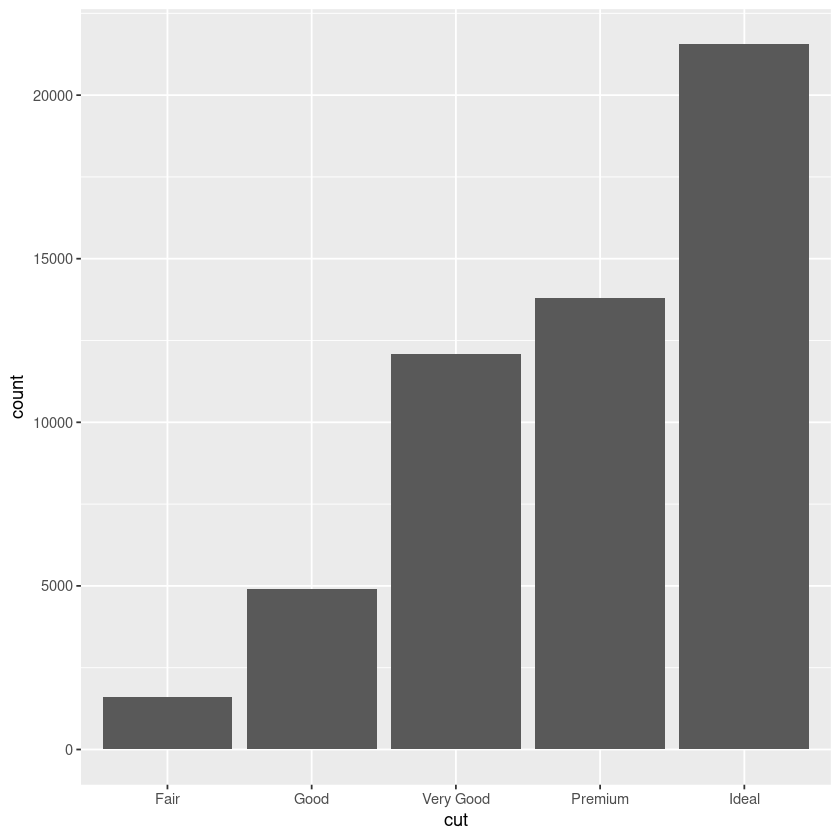

In [2]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

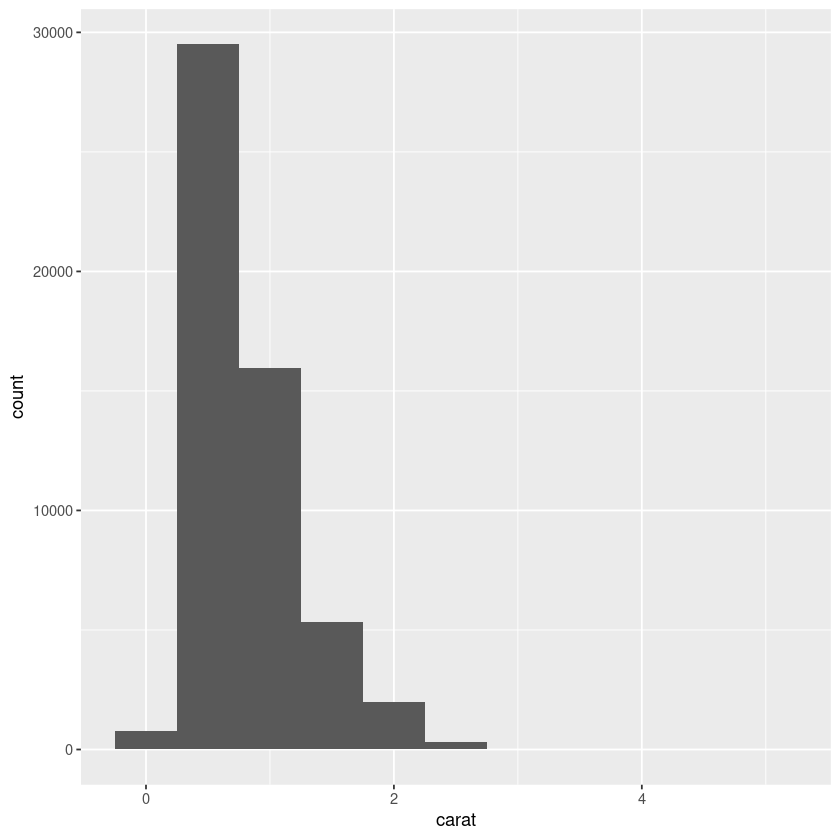

In [3]:
ggplot(data = diamonds) +  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

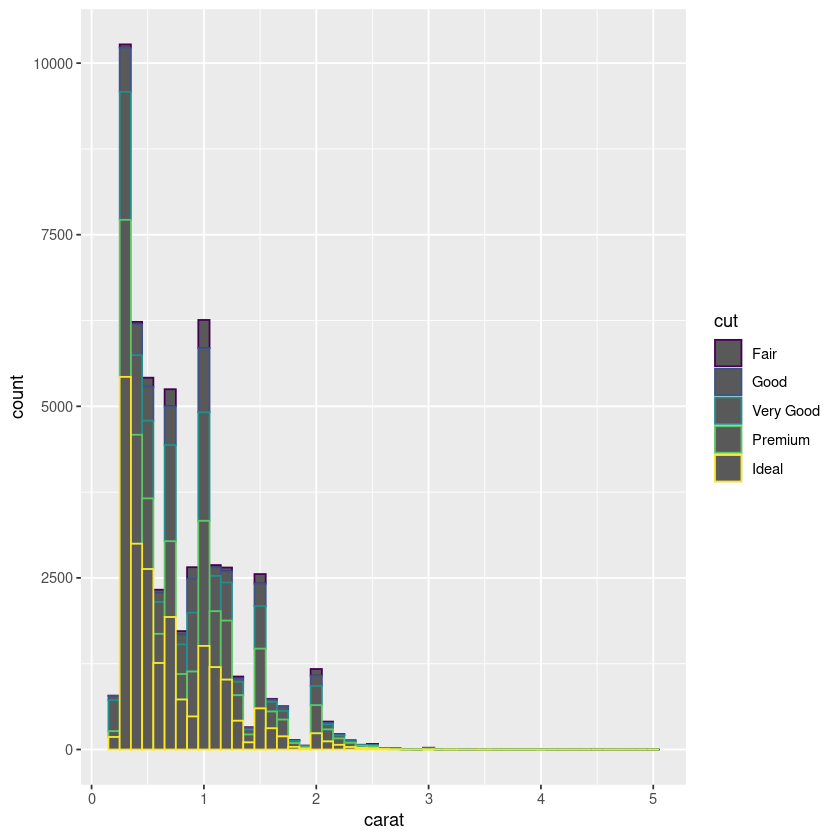

In [4]:
ggplot(data = diamonds, mapping = aes(x = carat, colour = cut)) +
  geom_histogram(binwidth = 0.1) #use freqpoly

## Valores atípicos

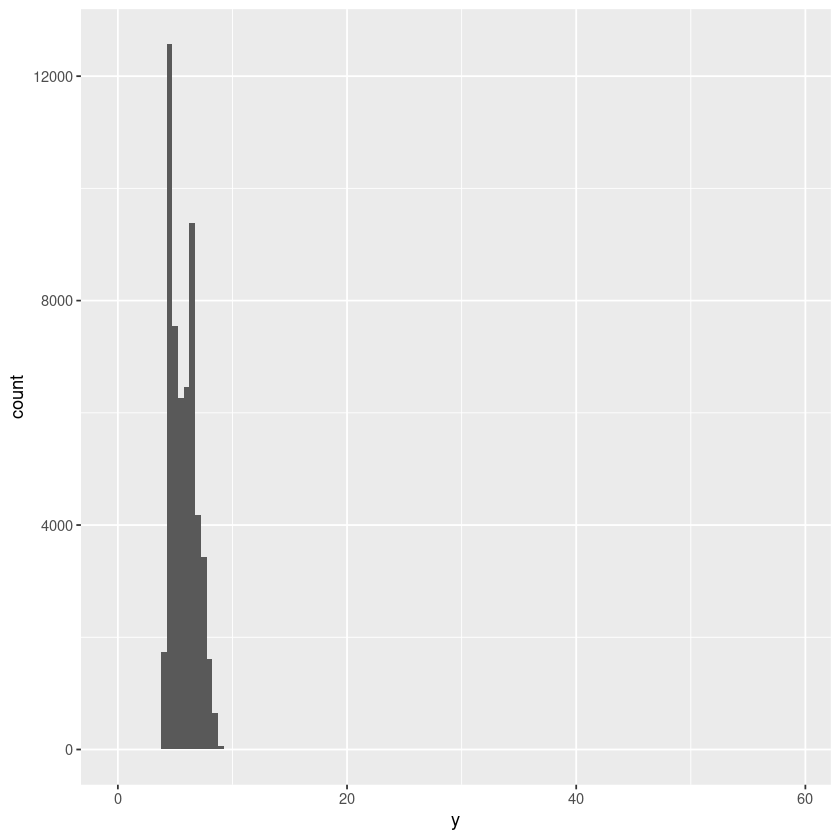

In [5]:
ggplot(diamonds) + geom_histogram(mapping = aes(x = y), binwidth = 0.5)

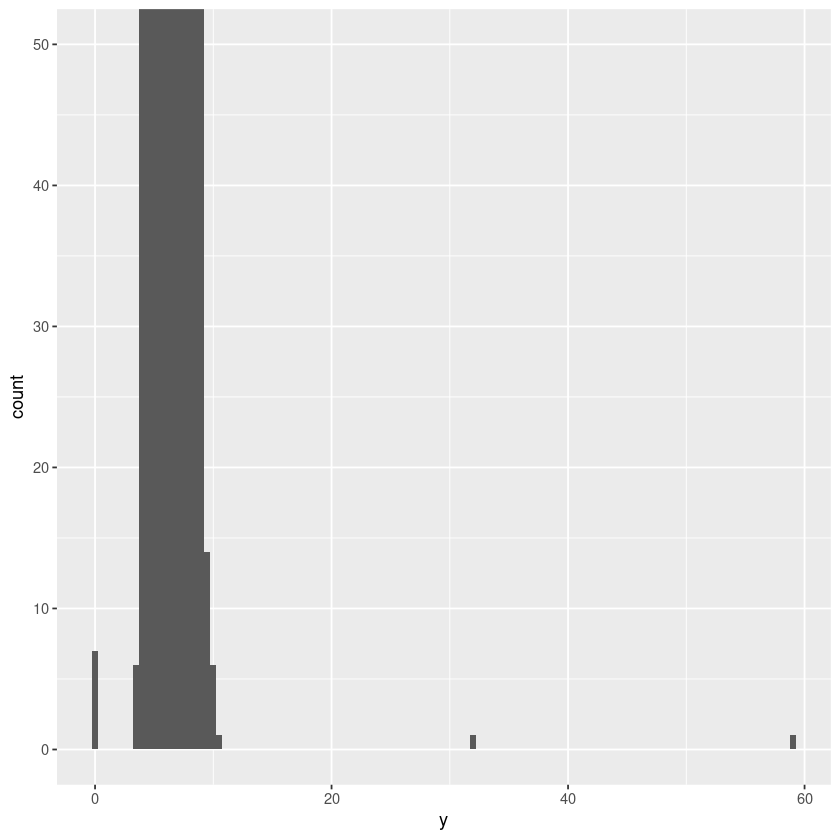

In [6]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

In [7]:
outliers <- diamonds %>% filter(y < 3 | y > 30) %>% arrange(price)
outliers

carat cut       color clarity depth table price x    y    z   
1 0.51  Ideal     E     VS1     61.8  55     2075 5.15 31.8 5.12
2 0.71  Good      F     SI2     64.1  60     2130 0.00  0.0 0.00
3 0.71  Good      F     SI2     64.1  60     2130 0.00  0.0 0.00
4 1.00  Very Good H     VS2     63.3  53     5139 0.00  0.0 0.00
5 1.14  Fair      G     VS1     57.5  67     6381 0.00  0.0 0.00
6 2.00  Premium   H     SI2     58.9  57    12210 8.09 58.9 8.06
7 1.56  Ideal     G     VS2     62.2  54    12800 0.00  0.0 0.00
8 1.20  Premium   D     VVS1    62.1  59    15686 0.00  0.0 0.00
9 2.25  Premium   H     SI2     62.8  59    18034 0.00  0.0 0.00

## Valores faltantes

Warning message:
“Removed 325 rows containing missing values (geom_point).”

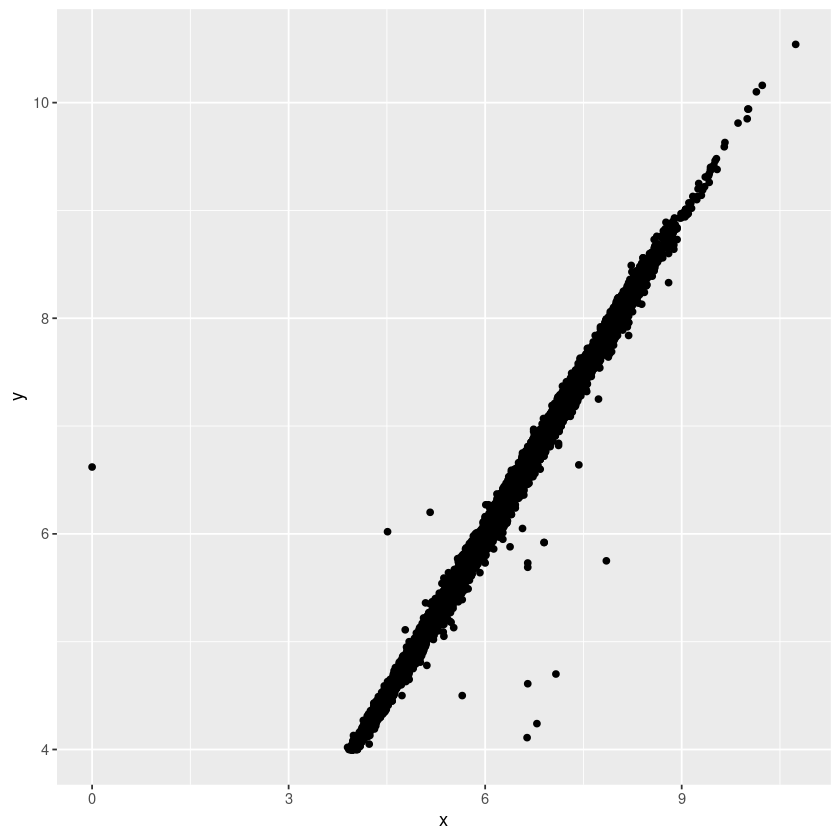

In [8]:
diamonds2 <- diamonds %>% 
  mutate(y = ifelse(y < 4 | y > 20, NA, y))

ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point() 

## Covariación

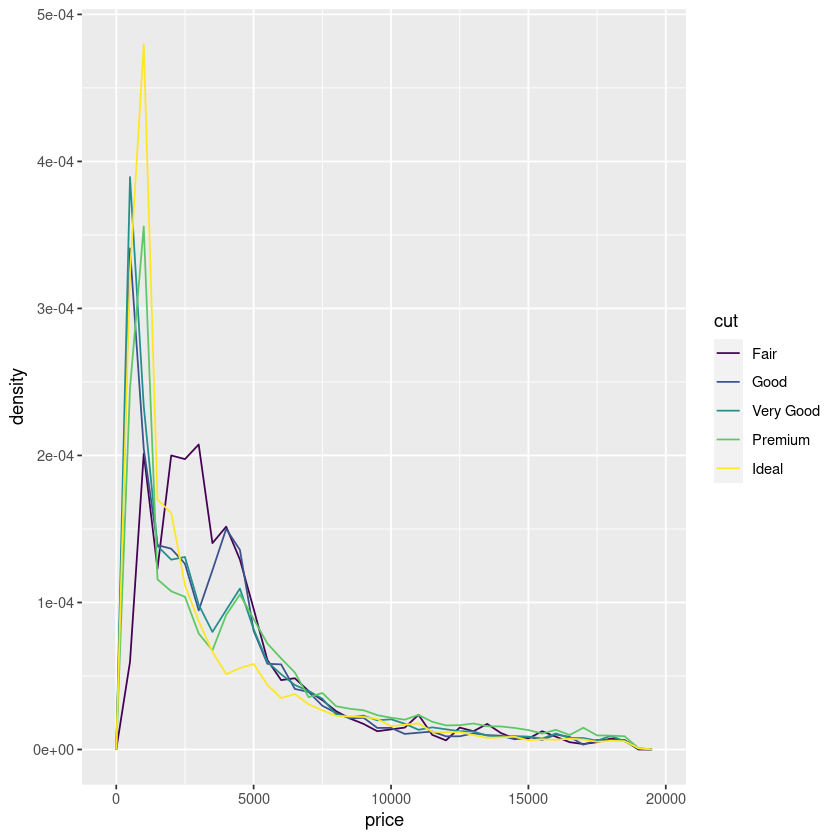

In [9]:
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

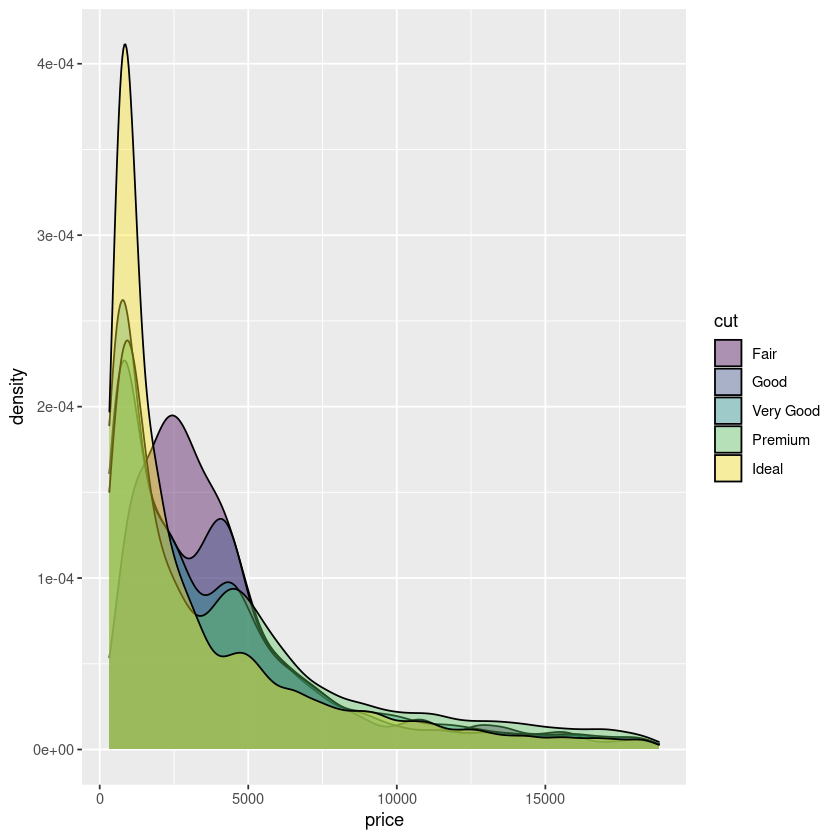

In [10]:
ggplot(diamonds, aes(x = price, fill = cut)) +
  geom_density(alpha = 0.4)

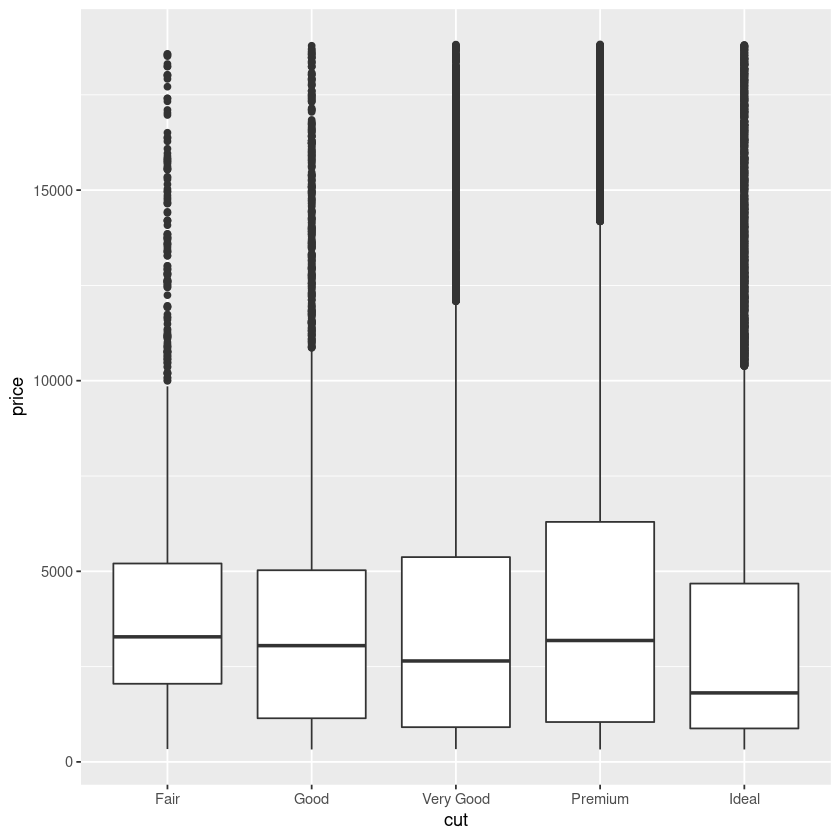

In [13]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot() 

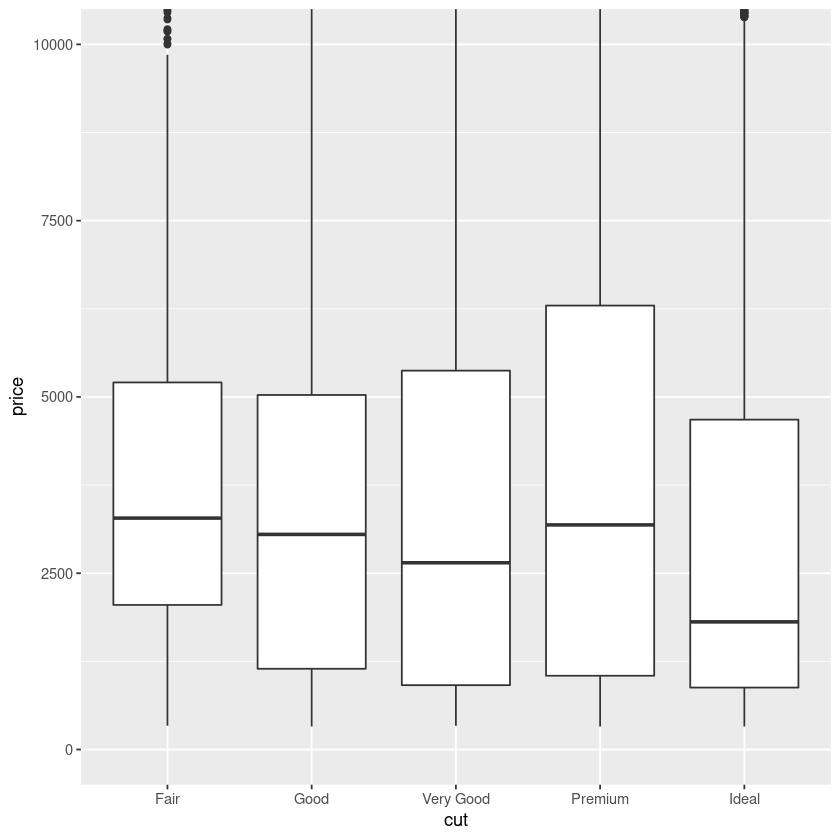

In [14]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot() +   coord_cartesian(ylim = c(0, 10000))

## Correlación

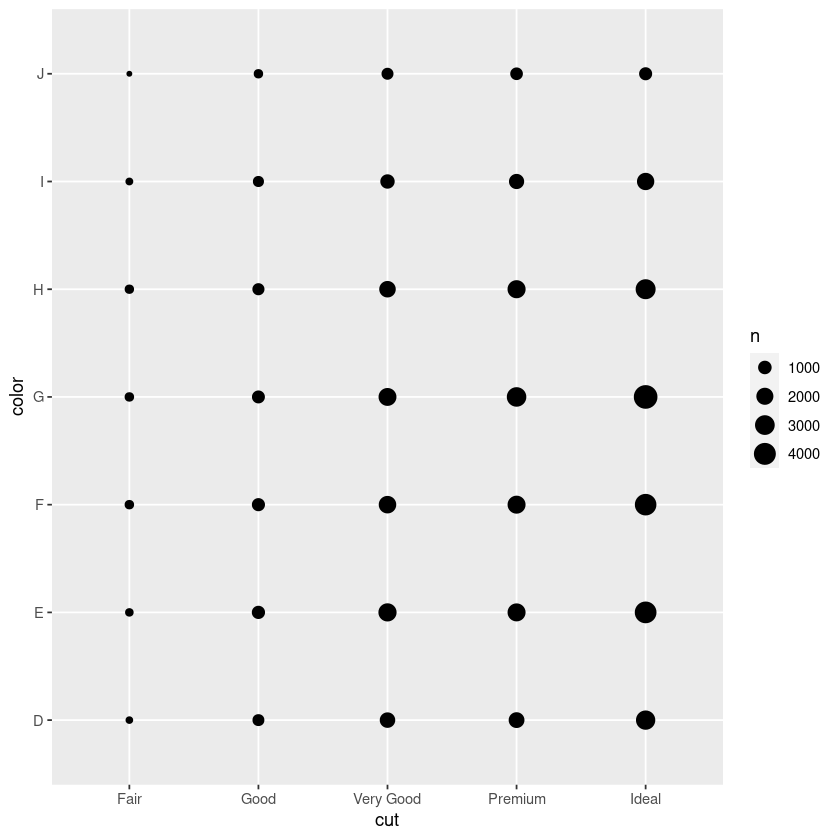

In [15]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

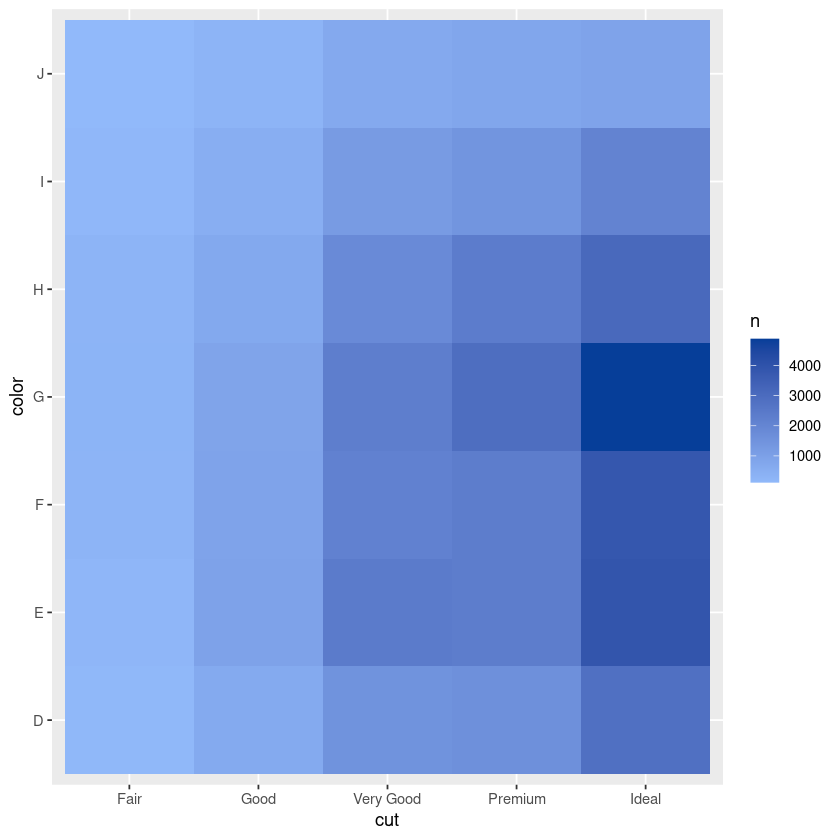

In [16]:
diamonds %>% count(cut, color) %>%  
  ggplot(mapping = aes(x = cut, y = color)) +
    geom_tile(mapping = aes(fill = n)) + scale_fill_gradient(low = "#91b9fa", high = "#063e99")

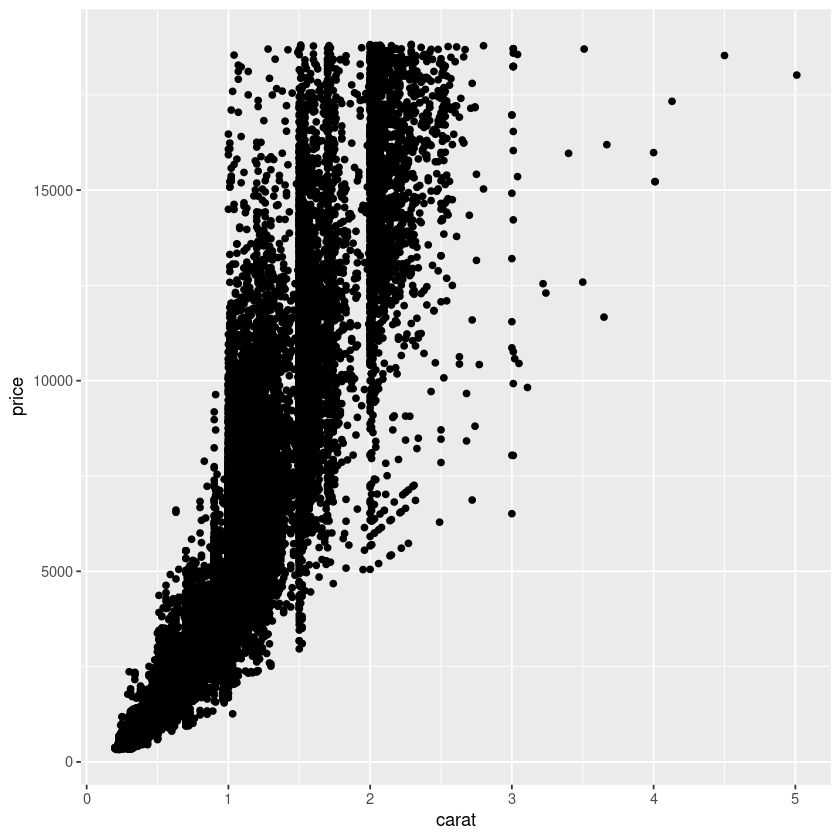

In [17]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))

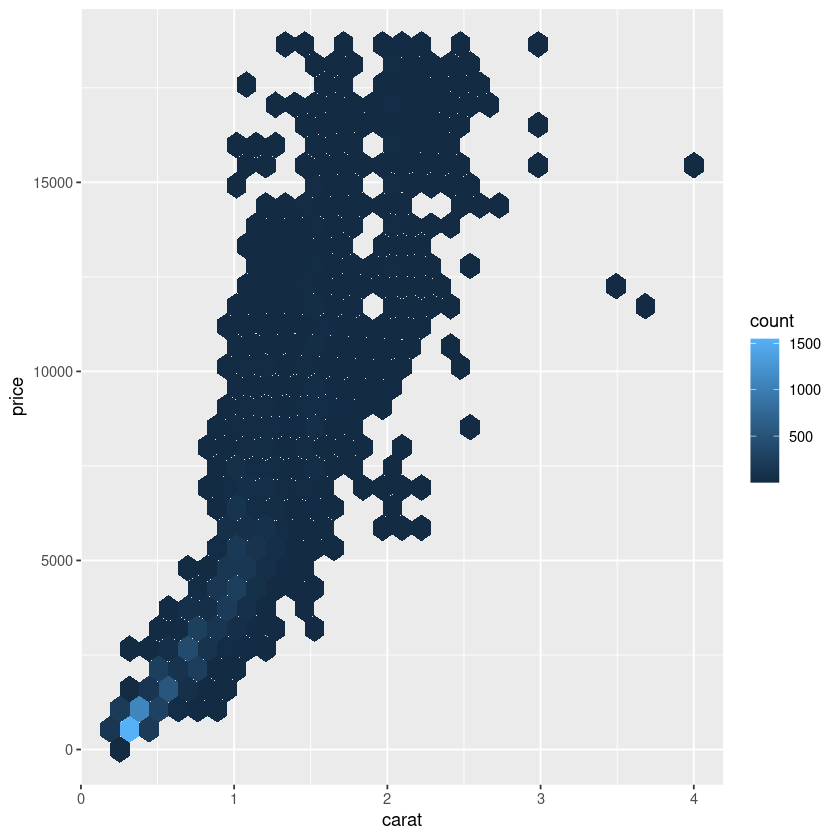

In [18]:
library(hexbin)

small <- diamonds[sample(nrow(diamonds),10000), ]
ggplot(data = small,aes(carat, price)) + geom_hex()

Warning message:
“Ignoring unknown aesthetics: orientation”

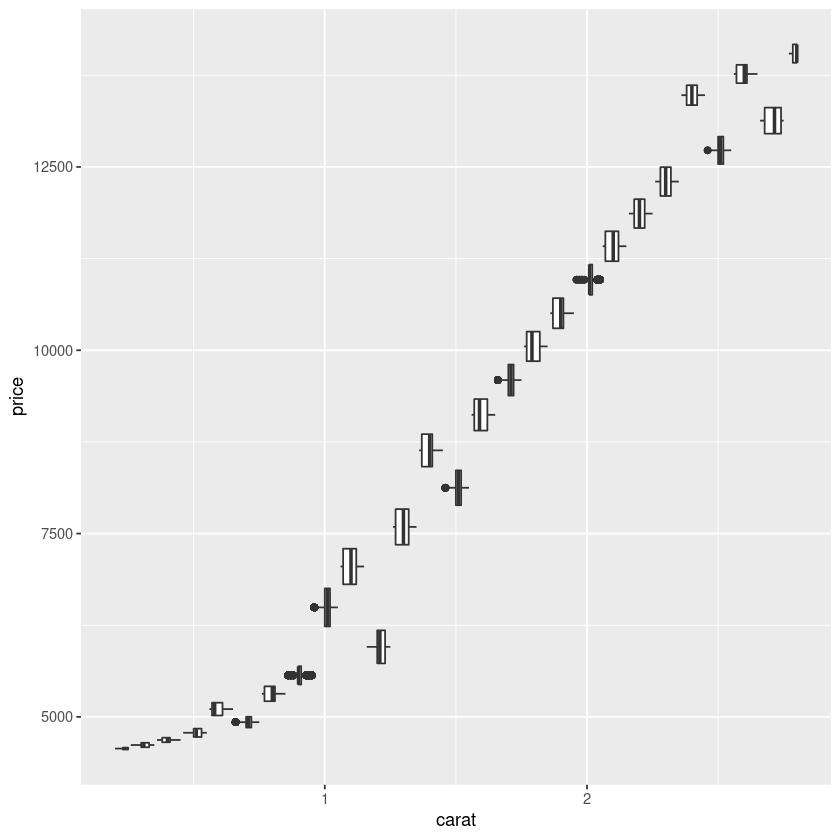

In [19]:
less3 <- diamonds %>% filter(carat < 3)
ggplot(data = less3, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1), orientation = "x"))

In [20]:
mtcars

mpg  cyl disp  hp  drat wt    qsec  vs am gear carb
Mazda RX4           21.0 6   160.0 110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag       21.0 6   160.0 110 3.90 2.875 17.02 0  1  4    4   
Datsun 710          22.8 4   108.0  93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive      21.4 6   258.0 110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout   18.7 8   360.0 175 3.15 3.440 17.02 0  0  3    2   
Valiant             18.1 6   225.0 105 2.76 3.460 20.22 1  0  3    1   
Duster 360          14.3 8   360.0 245 3.21 3.570 15.84 0  0  3    4   
Merc 240D           24.4 4   146.7  62 3.69 3.190 20.00 1  0  4    2   
Merc 230            22.8 4   140.8  95 3.92 3.150 22.90 1  0  4    2   
Merc 280            19.2 6   167.6 123 3.92 3.440 18.30 1  0  4    4   
Merc 280C           17.8 6   167.6 123 3.92 3.440 18.90 1  0  4    4   
Merc 450SE          16.4 8   275.8 180 3.07 4.070 17.40 0  0  3    3   
Merc 450SL          17.3 8   275.8 180 3.07 3.730 17.60 0  0  3    3   
Merc 450SLC         15.2 8   275.8 180 3.07 3.780 18.00 0  0  3    3   
Cadillac Fleetwood  10.4 8   472.0 205 2.93 5.250 17.98 0  0  3    4   
Lincoln Continental 10.4 8   460.0 215 3.00 5.424 17.82 0  0  3    4   
Chrysler Imperial   14.7 8   440.0 230 3.23 5.345 17.42 0  0  3    4   
Fiat 128            32.4 4    78.7  66 4.08 2.200 19.47 1  1  4    1   
Honda Civic         30.4 4    75.7  52 4.93 1.615 18.52 1  1  4    2   
Toyota Corolla      33.9 4    71.1  65 4.22 1.835 19.90 1  1  4    1   
Toyota Corona       21.5 4   120.1  97 3.70 2.465 20.01 1  0  3    1   
Dodge Challenger    15.5 8   318.0 150 2.76 3.520 16.87 0  0  3    2   
AMC Javelin         15.2 8   304.0 150 3.15 3.435 17.30 0  0  3    2   
Camaro Z28          13.3 8   350.0 245 3.73 3.840 15.41 0  0  3    4   
Pontiac Firebird    19.2 8   400.0 175 3.08 3.845 17.05 0  0  3    2   
Fiat X1-9           27.3 4    79.0  66 4.08 1.935 18.90 1  1  4    1   
Porsche 914-2       26.0 4   120.3  91 4.43 2.140 16.70 0  1  5    2   
Lotus Europa        30.4 4    95.1 113 3.77 1.513 16.90 1  1  5    2   
Ford Pantera L      15.8 8   351.0 264 4.22 3.170 14.50 0  1  5    4   
Ferrari Dino        19.7 6   145.0 175 3.62 2.770 15.50 0  1  5    6   
Maserati Bora       15.0 8   301.0 335 3.54 3.570 14.60 0  1  5    8   
Volvo 142E          21.4 4   121.0 109 4.11 2.780 18.60 1  1  4    2

In [27]:
# select numeric variables
df <- dplyr::select_if(mtcars, is.numeric) 

# calulate the correlations
r <- cor(df, use="complete.obs")
round(r,2)

mpg   cyl   disp  hp    drat  wt    qsec  vs    am    gear  carb 
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00

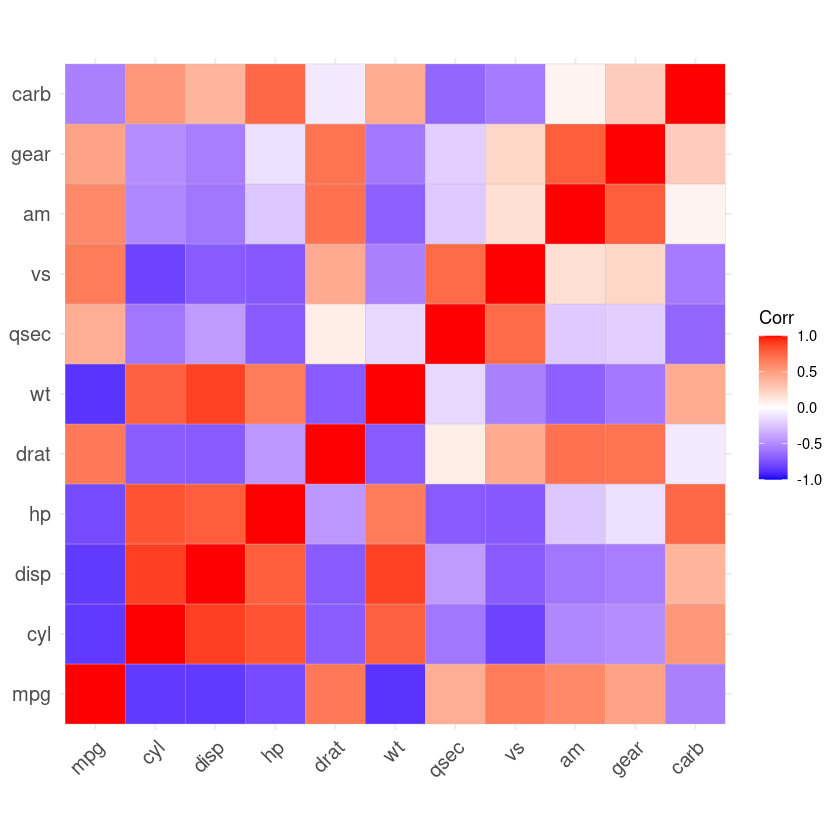

In [28]:
library(ggcorrplot)
ggcorrplot(r)

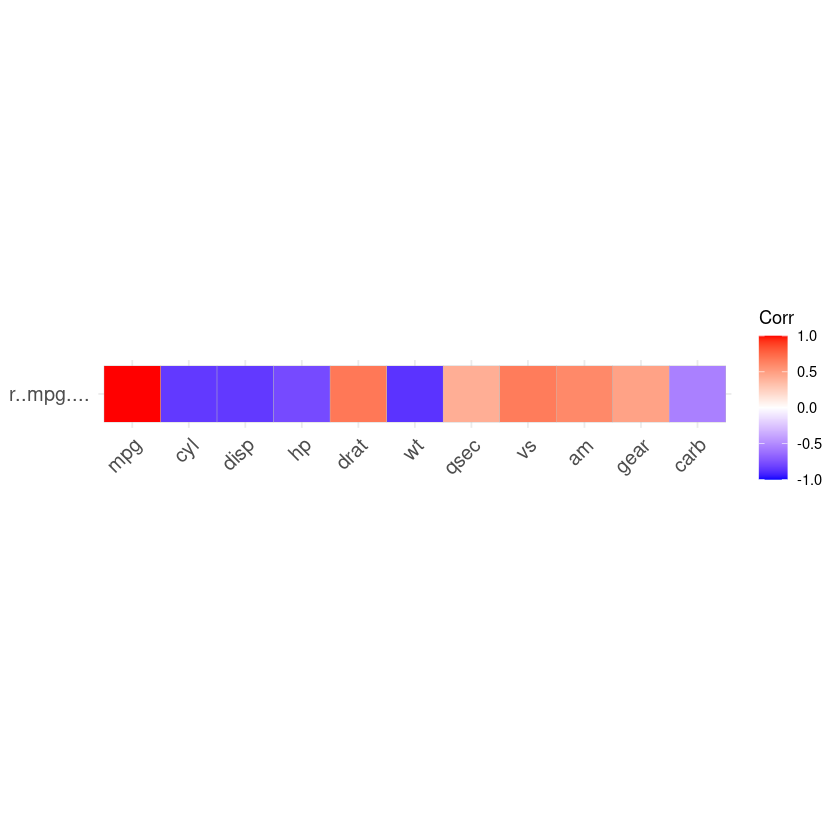

In [43]:
#Alternativa con solo una fila
ggcorrplot(data.frame(r["mpg",]))


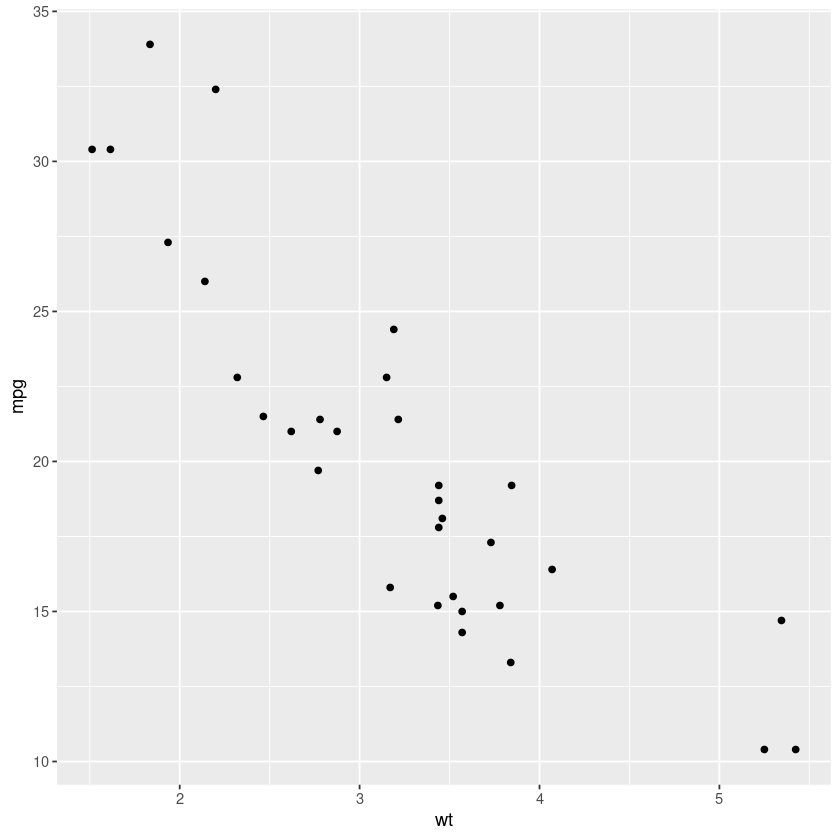

In [23]:
plot <- ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
plot

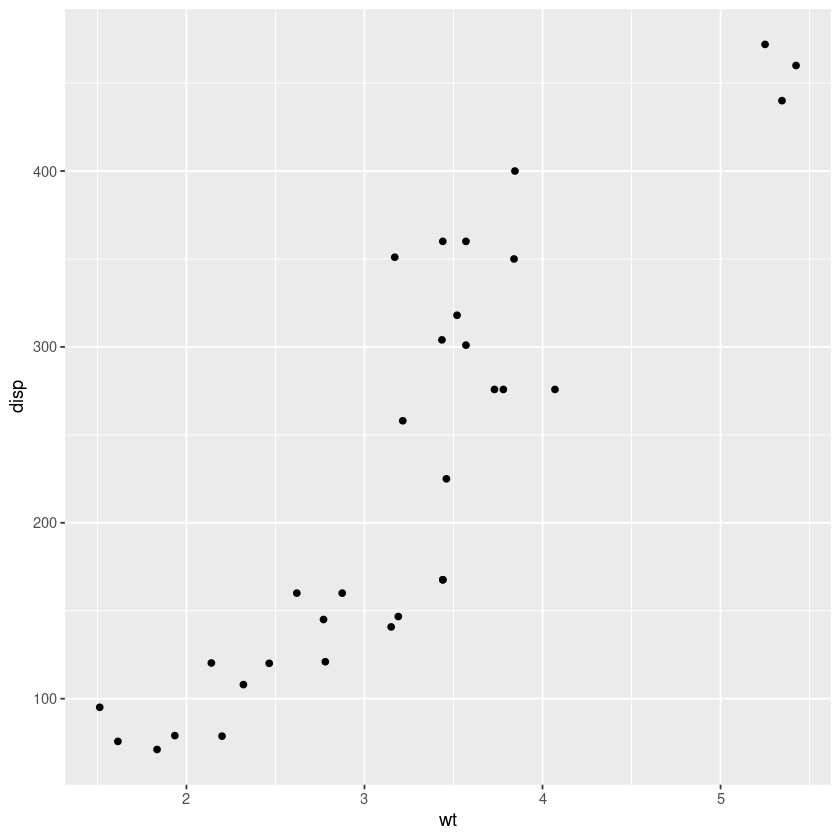

In [24]:
plot <- ggplot(mtcars, aes(x=wt, y=disp)) + geom_point()
plot

# Métodos gráficos

## Comparación de cuantiles

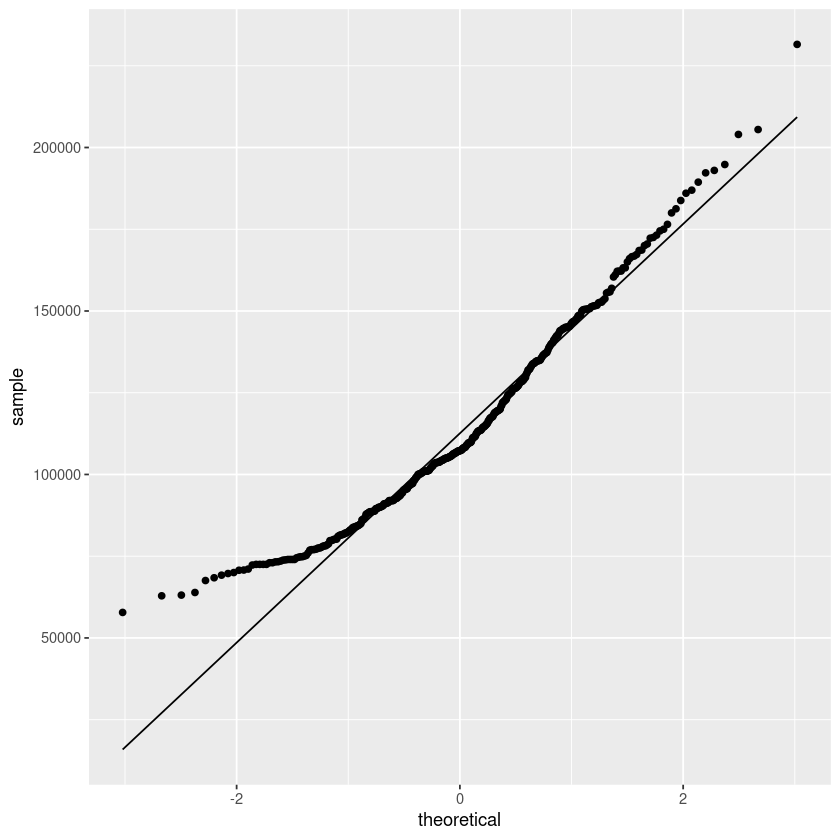

In [29]:
data(Salaries, package="carData")
ggplot(Salaries, aes(sample = salary)) + 
  geom_qq() +
  geom_qq_line()

## Normalidad

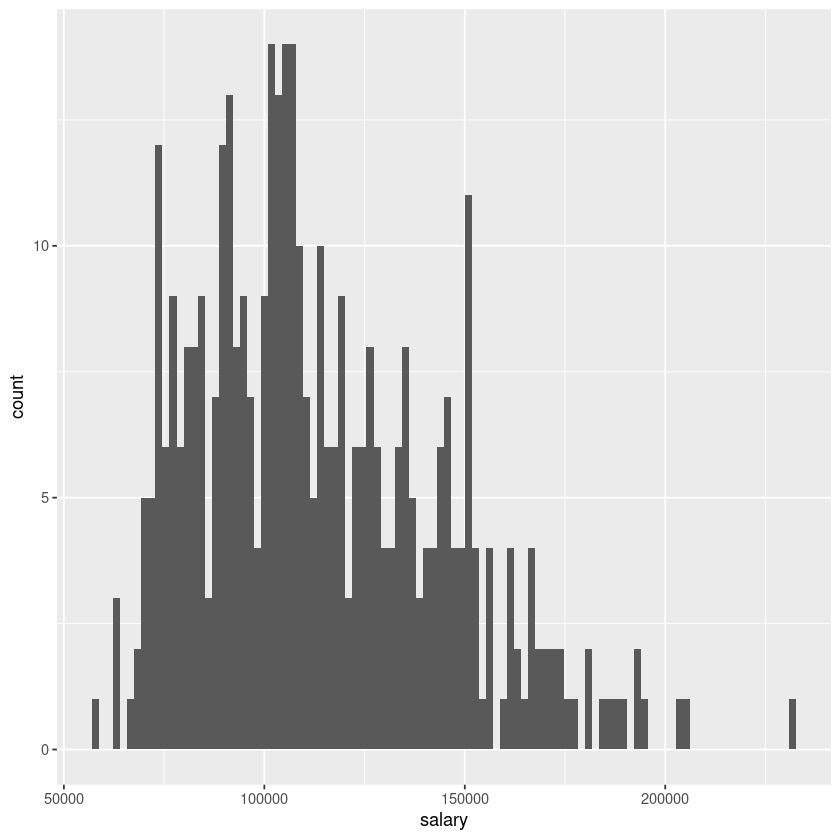

In [30]:
ggplot(Salaries, aes(x = salary)) +
  geom_histogram(bins = 100)

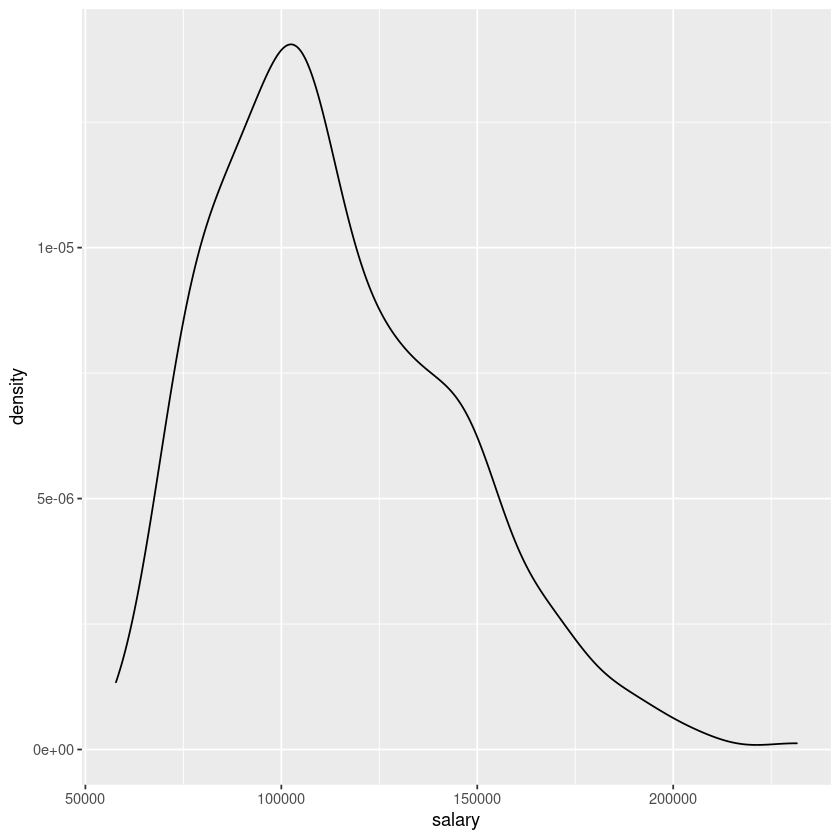

In [31]:
ggplot(Salaries, aes(x = salary )) + #fill="blue" in aes ?????
  geom_density()

## Facetas

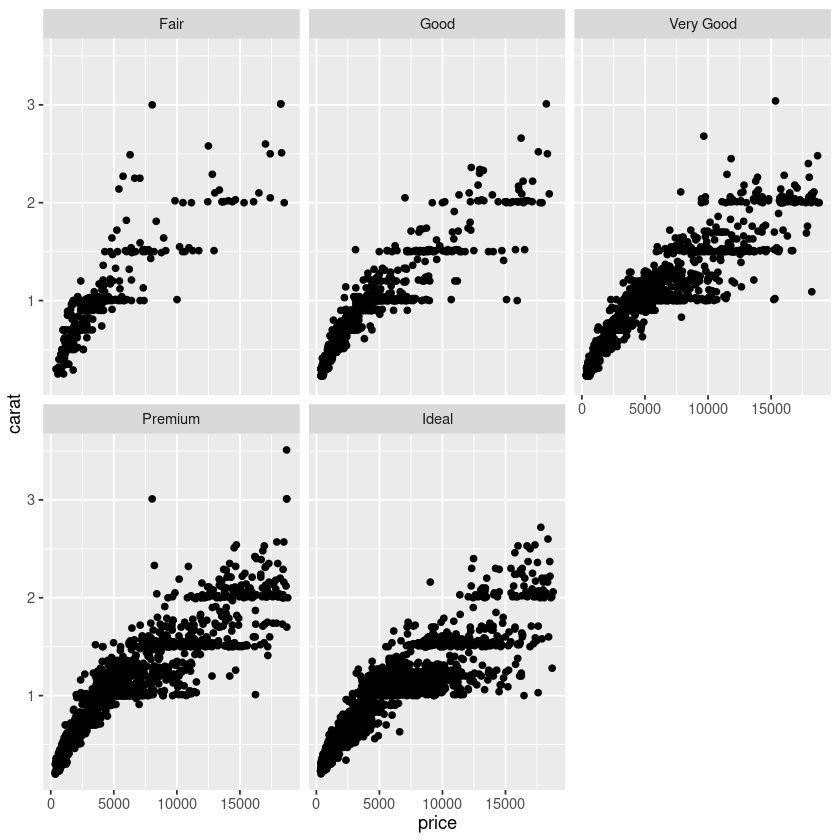

In [32]:
small <- diamonds[sample(nrow(diamonds),10000), ]
ggplot(data = small, aes(x = price, y = carat)) +  geom_point() +  facet_wrap(~cut)

In [33]:
Salaries


rank      discipline yrs.since.phd yrs.service sex    salary
1   Prof      B          19            18          Male   139750
2   Prof      B          20            16          Male   173200
3   AsstProf  B           4             3          Male    79750
4   Prof      B          45            39          Male   115000
5   Prof      B          40            41          Male   141500
6   AssocProf B           6             6          Male    97000
7   Prof      B          30            23          Male   175000
8   Prof      B          45            45          Male   147765
9   Prof      B          21            20          Male   119250
10  Prof      B          18            18          Female 129000
11  AssocProf B          12             8          Male   119800
12  AsstProf  B           7             2          Male    79800
13  AsstProf  B           1             1          Male    77700
14  AsstProf  B           2             0          Male    78000
15  Prof      B          20            18          Male   104800
16  Prof      B          12             3          Male   117150
17  Prof      B          19            20          Male   101000
18  Prof      A          38            34          Male   103450
19  Prof      A          37            23          Male   124750
20  Prof      A          39            36          Female 137000
21  Prof      A          31            26          Male    89565
22  Prof      A          36            31          Male   102580
23  Prof      A          34            30          Male    93904
24  Prof      A          24            19          Male   113068
25  AssocProf A          13             8          Female  74830
26  Prof      A          21             8          Male   106294
27  Prof      A          35            23          Male   134885
28  AsstProf  B           5             3          Male    82379
29  AsstProf  B          11             0          Male    77000
30  Prof      B          12             8          Male   118223
⋮   ⋮         ⋮          ⋮             ⋮           ⋮      ⋮     
368 AssocProf A          10             1          Male   108413
369 Prof      A          35            30          Male   131950
370 Prof      A          33            31          Male   134690
371 AssocProf A          13             8          Male    78182
372 Prof      A          23            20          Male   110515
373 Prof      A          12             7          Male   109707
374 Prof      A          30            26          Male   136660
375 Prof      A          27            19          Male   103275
376 Prof      A          28            26          Male   103649
377 AsstProf  A           4             1          Male    74856
378 AsstProf  A           6             3          Male    77081
379 Prof      A          38            38          Male   150680
380 AssocProf A          11             8          Male   104121
381 AsstProf  A           8             3          Male    75996
382 Prof      A          27            23          Male   172505
383 AssocProf A           8             5          Male    86895
384 Prof      A          44            44          Male   105000
385 Prof      A          27            21          Male   125192
386 Prof      A          15             9          Male   114330
387 Prof      A          29            27          Male   139219
388 Prof      A          29            15          Male   109305
389 Prof      A          38            36          Male   119450
390 Prof      A          33            18          Male   186023
391 Prof      A          40            19          Male   166605
392 Prof      A          30            19          Male   151292
393 Prof      A          33            30          Male   103106
394 Prof      A          31            19          Male   150564
395 Prof      A          42            25          Male   101738
396 Prof      A          25            15          Male    95329
397 AsstProf  A           8            

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


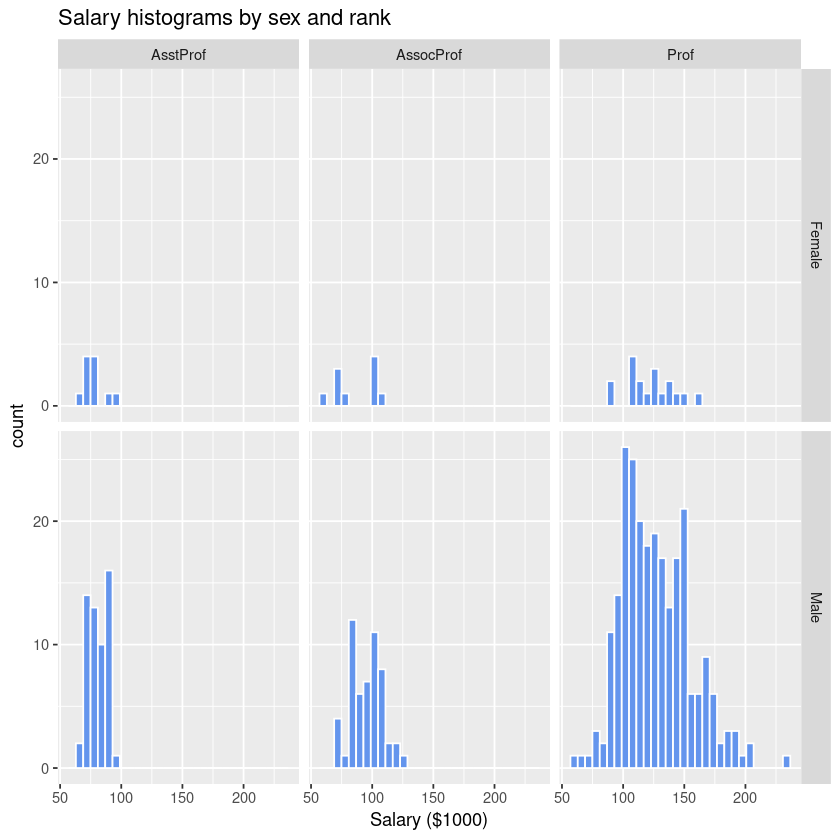

In [34]:
data(Salaries, package="carData")
ggplot(Salaries, aes(x = salary / 1000)) +
  geom_histogram(color = "white",
                 fill = "cornflowerblue") +
  facet_grid(sex ~ rank) +
  labs(title = "Salary histograms by sex and rank",
       x = "Salary ($1000)")